In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
import gdown
!gdown --fuzzy https://drive.google.com/file/d/1cE5HBHNj4ll8o_vceJNwJEHmQDJP_7Wj/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1cE5HBHNj4ll8o_vceJNwJEHmQDJP_7Wj
From (redirected): https://drive.google.com/uc?id=1cE5HBHNj4ll8o_vceJNwJEHmQDJP_7Wj&confirm=t&uuid=117e1175-4703-4ab1-9316-ce2bd294ba93
To: /content/OneDrive_1_16-02-2024.zip
100% 40.2M/40.2M [00:00<00:00, 144MB/s]


In [ ]:
!unzip /content/OneDrive_1_16-02-2024.zip

Archive:  /content/OneDrive_1_16-02-2024.zip
 extracting: Call Center Data Dictionary.pdf  
 extracting: CallCentre Data.xlsx    
 extracting: Customer Transactions Data Dictionary.pdf  
 extracting: Cutomer transactions.xlsx  
 extracting: Geography_lookup data dictionary.pdf  
 extracting: Geography_lookup.csv    


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1=pd.read_excel("/content/CallCentre Data.xlsx")

In [ ]:
df2=pd.read_excel("/content/Cutomer transactions.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df3=pd.read_csv("/content/Geography_lookup.csv")

In [ ]:
merged_df = pd.merge(df1, df2, on="Customer_ID")
merged_df = pd.merge(merged_df, df3, on="zipcode_primary")
merged_df

,Customer_ID,verbatims,call_center,issue_level1,issue_level2,call_category_1,call_category_2,resolution,upsell_xsell,churn,...,state,city,region_lat,region_long,state_lat,state_long,city_lat,city_long,zip_lat,zip_long
0,471,Customer service is no longer an option with y...,Bothell - IRU,Bill and Payments,Equipment Upgrade Fee,Process & Efficiency,NaN,Educated - Equipment upgrade fee,0,0,...,VA,Falls Church,39.04479,-78.0249,37.62894,-78.3891,NaN,NaN,38.88631,-77.1810
1,1057,My phone was stollen 5 days ago I got the new...,Davenport Call Center,Equipment,Equipment Change: Change IMEI/SIM,Product Range & Availability,Upgrades/Renewals,Resolved: Updated IMEI,0,0,...,CA,Santa Barbara,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070
2,79079,None,Miramar - IRU,Bill and Payments,Bill Format Explanation,Friendly & Courteous,NaN,Educated - Bill Layout,0,0,...,CA,Santa Barbara,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070
3,1690614,Buena los recomendaria a otra persona,Monterrey Call Center,Payments,Make a Payment,Network/Coverage,NaN,Resolved: Processed payment/ waived fee,0,0,...,CA,Santa Barbara,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070
4,1843458,Great,Mansfield - IRU,Services Troubleshooting,Credit Adjustment,Miscellaneous,NaN,Completed,0,0,...,CA,Santa Barbara,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56539,3997976,Anytime,Malvern - IRU,Bill and Payments,Bill Review,Miscellaneous,NaN,Educated - Explanation of bill charges,0,0,...,VA,New Kent,39.04479,-78.0249,37.62894,-78.3891,37.51750,-76.9792,37.54528,-77.0666
56540,3998278,It was fine Just slow memorized intro speech...,Cedar City Call Center,Plans and Features,Basic Voicemail feature,Cost of Service,NaN,Resolved: Upgraded feature,0,0,...,TX,Kingsbury,32.62087,-96.5479,31.27906,-97.6028,29.64778,-97.8278,29.65564,-97.7722
56541,3998832,Happy Friendl,Pasig Call Center,Services Troubleshooting,Equipment Synchronization,Network/Coverage,NaN,Resolved: Shared how to use,0,1,...,MN,Virginia,41.86956,-87.6709,45.80654,-93.9945,47.52333,-92.5364,47.52738,-92.5337
56542,3999337,None,Puerto Rico Call Center,Account,Fraud,Helpfulness,NaN,Transfer to fraud,0,0,...,CA,Smartville,43.32518,-120.9810,36.98335,-120.1010,39.20750,-121.2980,39.19322,-121.2900


In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

In [ ]:
merged_df['sentiment_score'] = merged_df['verbatims'].apply(get_sentiment)

In [ ]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
merged_df['sentiment_category'] = merged_df['sentiment_score'].apply(categorize_sentiment)

In [ ]:
merged_df

,Customer_ID,verbatims,call_center,issue_level1,issue_level2,call_category_1,call_category_2,resolution,upsell_xsell,churn,...,region_lat,region_long,state_lat,state_long,city_lat,city_long,zip_lat,zip_long,sentiment_score,sentiment_category
0,471,Customer service is no longer an option with y...,Bothell - IRU,Bill and Payments,Equipment Upgrade Fee,Process & Efficiency,NaN,Educated - Equipment upgrade fee,0,0,...,39.04479,-78.0249,37.62894,-78.3891,NaN,NaN,38.88631,-77.1810,0.000000,Neutral
1,1057,My phone was stollen 5 days ago I got the new...,Davenport Call Center,Equipment,Equipment Change: Change IMEI/SIM,Product Range & Availability,Upgrades/Renewals,Resolved: Updated IMEI,0,0,...,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070,0.068182,Positive
2,79079,None,Miramar - IRU,Bill and Payments,Bill Format Explanation,Friendly & Courteous,NaN,Educated - Bill Layout,0,0,...,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070,0.000000,Neutral
3,1690614,Buena los recomendaria a otra persona,Monterrey Call Center,Payments,Make a Payment,Network/Coverage,NaN,Resolved: Processed payment/ waived fee,0,0,...,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070,0.000000,Neutral
4,1843458,Great,Mansfield - IRU,Services Troubleshooting,Credit Adjustment,Miscellaneous,NaN,Completed,0,0,...,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070,0.800000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56539,3997976,Anytime,Malvern - IRU,Bill and Payments,Bill Review,Miscellaneous,NaN,Educated - Explanation of bill charges,0,0,...,39.04479,-78.0249,37.62894,-78.3891,37.51750,-76.9792,37.54528,-77.0666,0.000000,Neutral
56540,3998278,It was fine Just slow memorized intro speech...,Cedar City Call Center,Plans and Features,Basic Voicemail feature,Cost of Service,NaN,Resolved: Upgraded feature,0,0,...,32.62087,-96.5479,31.27906,-97.6028,29.64778,-97.8278,29.65564,-97.7722,0.072222,Positive
56541,3998832,Happy Friendl,Pasig Call Center,Services Troubleshooting,Equipment Synchronization,Network/Coverage,NaN,Resolved: Shared how to use,0,1,...,41.86956,-87.6709,45.80654,-93.9945,47.52333,-92.5364,47.52738,-92.5337,0.800000,Positive
56542,3999337,None,Puerto Rico Call Center,Account,Fraud,Helpfulness,NaN,Transfer to fraud,0,0,...,43.32518,-120.9810,36.98335,-120.1010,39.20750,-121.2980,39.19322,-121.2900,0.000000,Neutral


In [ ]:
merged_df.to_csv("merged_data(decoded).csv", index=False)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
interactions_by_location = merged_df.groupby('call_center').size().reset_index(name='resolution')

# Display the result
print(interactions_by_location)

                   call_center  resolution
0          Alabang Call Center         637
1           Albany Call Center         426
2    Alexandria - Billing Chat         243
3           Arnold Call Center        1146
4          Ashland Call Center         627
..                         ...         ...
103          Terre Haute - IRU         732
104          Tulsa Call Center         485
105        Welland Call Center         752
106       Wheeling Call Center         286
107  Wichita Falls Call Center         631

[108 rows x 2 columns]


In [ ]:
desired_call_center = ["Teleperformance2","Miramar - IRU"]
for i in range(2) :

  call_center_df = merged_df[merged_df['call_center'] == desired_call_center[i]]

  # Count the number of resolutions
  resolution_count = call_center_df['resolution'].count()

  print(f"Number of resolutions for {desired_call_center[i]}: {resolution_count}")

Number of resolutions for Teleperformance2: 1766
Number of resolutions for Miramar - IRU: 1659


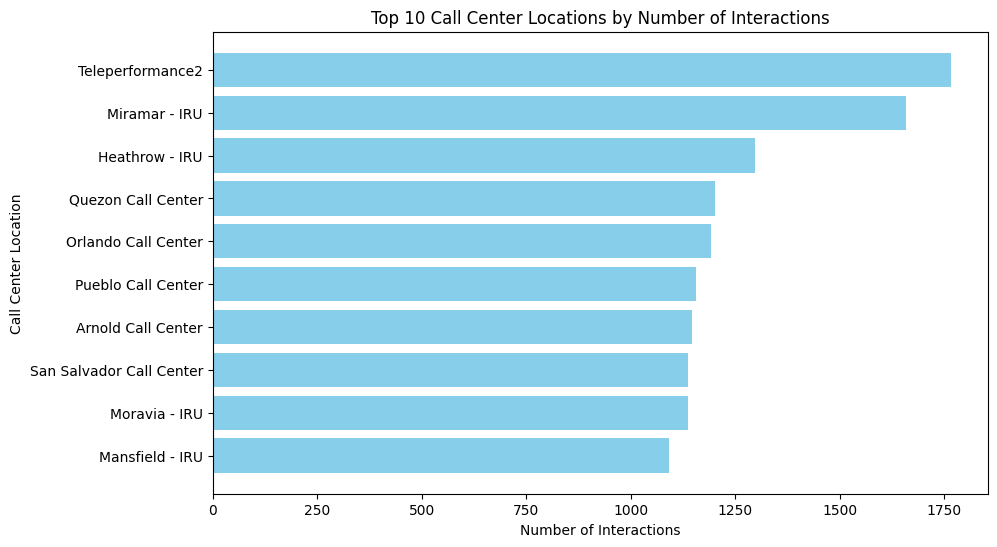

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df
interactions_by_location = merged_df.groupby('call_center').size().reset_index(name='resolution')

# Sort the DataFrame by interaction count in descending order
interactions_by_location_sorted = interactions_by_location.sort_values(by='resolution', ascending=False)

# Get the top 10 call center locations
top_10_locations = interactions_by_location_sorted.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(top_10_locations['call_center'], top_10_locations['resolution'], color='skyblue')
plt.xlabel('Number of Interactions')
plt.ylabel('Call Center Location')
plt.title('Top 10 Call Center Locations by Number of Interactions')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()


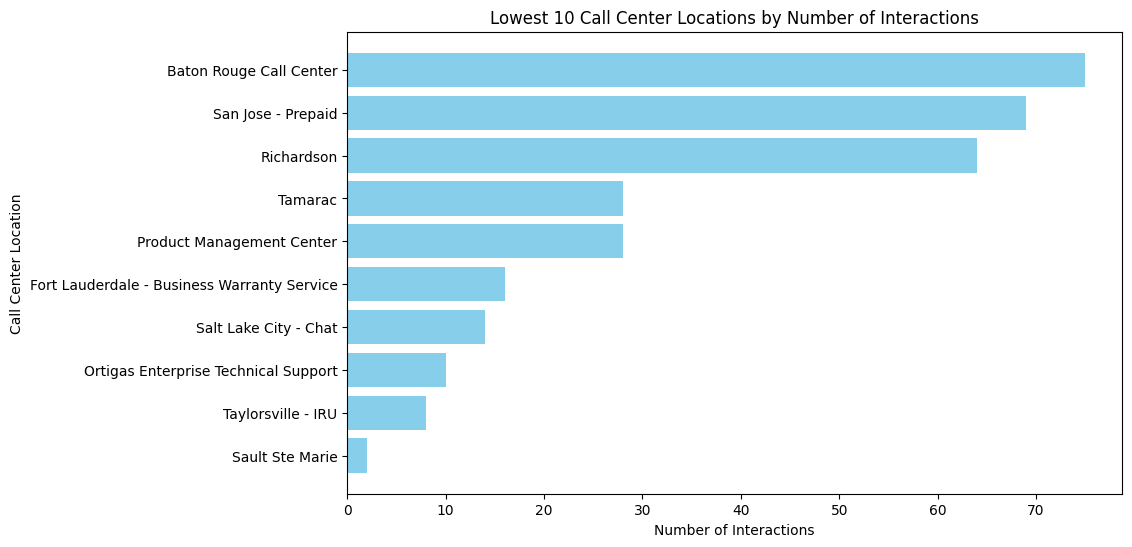

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df
interactions_by_location = merged_df.groupby('call_center').size().reset_index(name='resolution')

# Sort the DataFrame by interaction count in descending order
interactions_by_location_sorted = interactions_by_location.sort_values(by='resolution', ascending=False)

# Get the top 10 call center locations
top_10_locations = interactions_by_location_sorted.tail(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(top_10_locations['call_center'], top_10_locations['resolution'], color='skyblue')
plt.xlabel('Number of Interactions')
plt.ylabel('Call Center Location')
plt.title('Lowest 10 Call Center Locations by Number of Interactions')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

<ipython-input-20-287bf436f37c>:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)
<ipython-input-20-287bf436f37c>:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


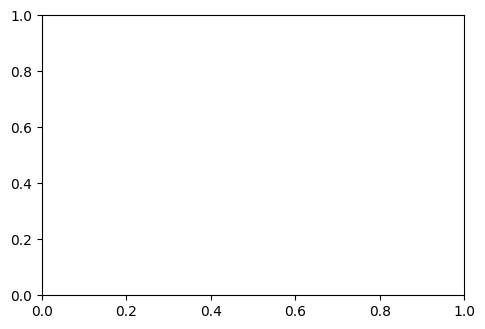

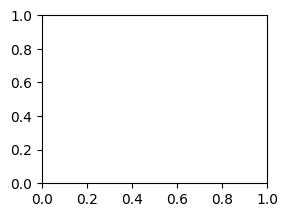

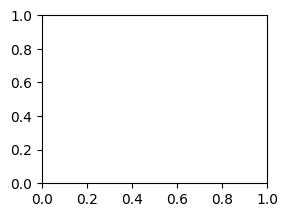

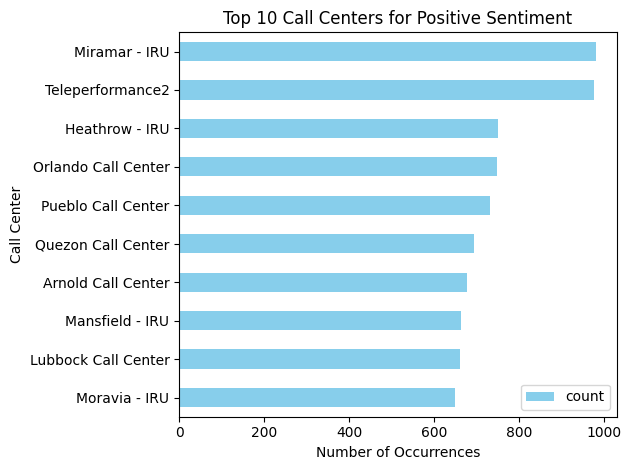

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df

# Group by both sentiment category and call center, and count the occurrences
sentiment_count = merged_df.groupby(['sentiment_category', 'call_center']).size().reset_index(name='count')

# Sort the DataFrame by count in descending order for each sentiment category
sentiment_count_sorted = sentiment_count.sort_values(by=['sentiment_category', 'count'], ascending=[True, False])

# Initialize an empty dictionary to store top 10 call centers for each sentiment category
top_10_call_centers = {}

# Iterate over unique sentiment categories
for sentiment_category in sentiment_count_sorted['sentiment_category'].unique():
    # Filter the DataFrame for the current sentiment category
    sentiment_df = sentiment_count_sorted[sentiment_count_sorted['sentiment_category'] == sentiment_category]
    # Get the top 10 call centers for the current sentiment category
    top_10_call_centers[sentiment_category] = sentiment_df.head(10)

# Plot the top 10 call centers for each sentiment category
plt.figure(figsize=(12, 8))

# Iterate over sentiment categories and plot
for i, sentiment_category in enumerate(top_10_call_centers.keys(), start=1):
    plt.subplot(2, 2, i)
    top_10_call_centers[sentiment_category].plot(kind='barh', x='call_center', y='count', color='skyblue')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Call Center')
    plt.title(f'Top 10 Call Centers for {sentiment_category} Sentiment')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

plt.tight_layout()
plt.show()


<ipython-input-21-4746150c09dd>:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)
<ipython-input-21-4746150c09dd>:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


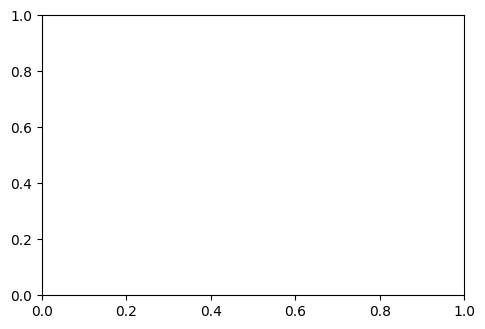

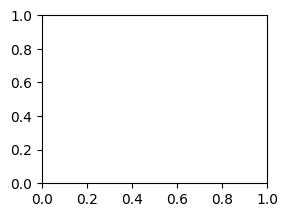

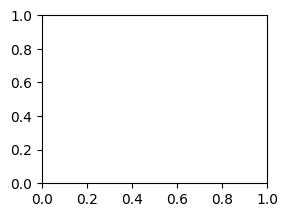

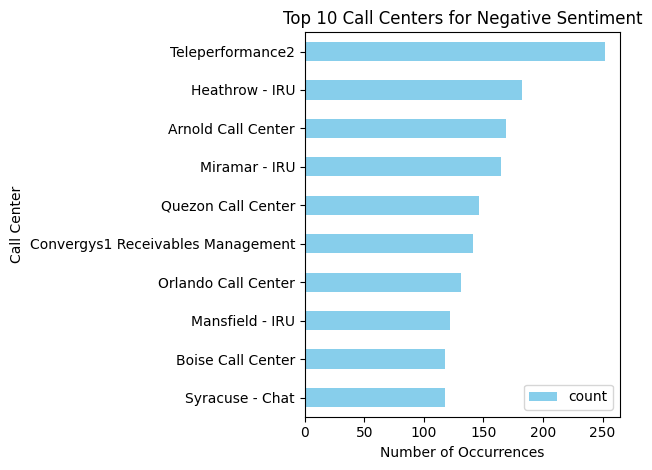

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df

# Group by both sentiment category and call center, and count the occurrences
sentiment_count = merged_df.groupby(['sentiment_category', 'call_center']).size().reset_index(name='count')

# Sort the DataFrame by count in descending order for each sentiment category
sentiment_count_sorted = sentiment_count.sort_values(by=['sentiment_category', 'count'], ascending=[True, False])

# Initialize an empty dictionary to store top 10 call centers for each sentiment category
top_10_call_centers = {}

# Iterate over unique sentiment categories
for sentiment_category in sentiment_count_sorted['sentiment_category'].unique():
    # Filter the DataFrame for the current sentiment category
    sentiment_df = sentiment_count_sorted[sentiment_count_sorted['sentiment_category'] == sentiment_category]
    # Get the top 10 call centers for the current sentiment category
    top_10_call_centers[sentiment_category] = sentiment_df.head(10)

# Plot the top 10 call centers for each sentiment category
plt.figure(figsize=(12, 8))

# Iterate over sentiment categories and plot
for i, sentiment_category in enumerate(['Positive', 'Neutral', 'Negative'], start=1):
    # Check if the sentiment category exists in the data
    if sentiment_category in top_10_call_centers:
        plt.subplot(2, 2, i)
        top_10_call_centers[sentiment_category].plot(kind='barh', x='call_center', y='count', color='skyblue')
        plt.xlabel('Number of Occurrences')
        plt.ylabel('Call Center')
        plt.title(f'Top 10 Call Centers for {sentiment_category} Sentiment')
        plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

plt.tight_layout()
plt.show()


<ipython-input-22-0c0ed4b9c2f8>:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)
<ipython-input-22-0c0ed4b9c2f8>:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


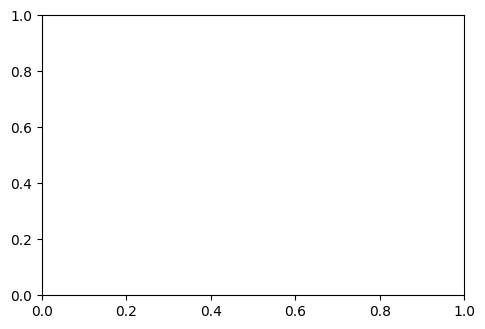

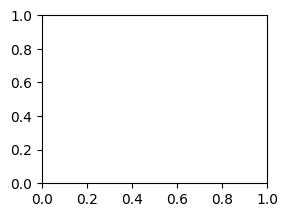

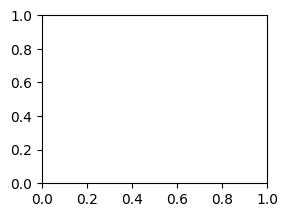

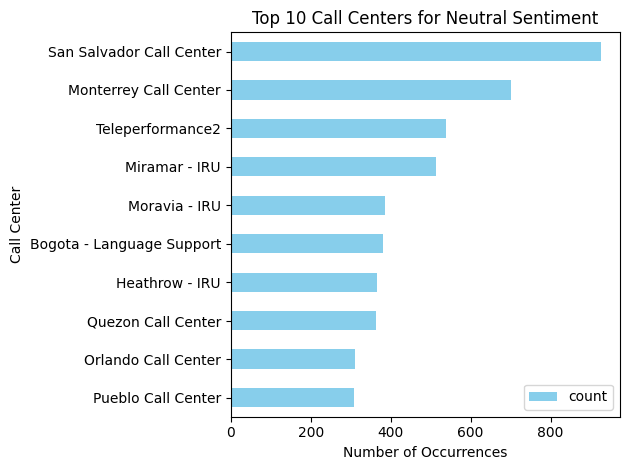

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df

# Group by both sentiment category and call center, and count the occurrences
sentiment_count = merged_df.groupby(['sentiment_category', 'call_center']).size().reset_index(name='count')

# Sort the DataFrame by count in descending order for each sentiment category
sentiment_count_sorted = sentiment_count.sort_values(by=['sentiment_category', 'count'], ascending=[True, False])

# Initialize an empty dictionary to store top 10 call centers for each sentiment category
top_10_call_centers = {}

# Iterate over unique sentiment categories
for sentiment_category in sentiment_count_sorted['sentiment_category'].unique():
    # Filter the DataFrame for the current sentiment category
    sentiment_df = sentiment_count_sorted[sentiment_count_sorted['sentiment_category'] == sentiment_category]
    # Get the top 10 call centers for the current sentiment category
    top_10_call_centers[sentiment_category] = sentiment_df.head(10)

# Plot the top 10 call centers for each sentiment category
plt.figure(figsize=(12, 8))

# Iterate over sentiment categories and plot
for i, sentiment_category in enumerate(['Positive', 'Negative' ,'Neutral'], start=1):
    # Check if the sentiment category exists in the data
    if sentiment_category in top_10_call_centers:
        plt.subplot(2, 2, i)
        top_10_call_centers[sentiment_category].plot(kind='barh', x='call_center', y='count', color='skyblue')
        plt.xlabel('Number of Occurrences')
        plt.ylabel('Call Center')
        plt.title(f'Top 10 Call Centers for {sentiment_category} Sentiment')
        plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

plt.tight_layout()
plt.show()

In [ ]:
desired_call_center = ["Teleperformance2", "Miramar - IRU"]
resolution_count = []
positive_sentiment_count = []

for i, call_center_name in enumerate(desired_call_center):
    # Filter the DataFrame for the current call center
    call_center_df = merged_df[merged_df['call_center'] == call_center_name]

    # Count the number of resolutions and positive sentiment occurrences
    resolution_count.append(call_center_df['resolution'].count())
    positive_sentiment_count.append(call_center_df[call_center_df['sentiment_category'] == 'Positive'].shape[0])

    print(f"Number of resolutions for {call_center_name}: {resolution_count[i]}")
    print(f"Number of positive sentiment occurrences for {call_center_name}: {positive_sentiment_count[i]}")

# Calculate the ratio of resolution count to positive resolution count for each call center
ratios = [resolution_count[i] / positive_sentiment_count[i] for i in range(2)]

# Determine which call center has the highest ratio
highest_ratio_call_center = desired_call_center[0] if ratios[0] > ratios[1] else desired_call_center[1]

print(f"The call center with the highest ratio of resolution count to positive resolution count is: {highest_ratio_call_center}")


Number of resolutions for Teleperformance2: 1766
Number of positive sentiment occurrences for Teleperformance2: 975
Number of resolutions for Miramar - IRU: 1659
Number of positive sentiment occurrences for Miramar - IRU: 981
The call center with the highest ratio of resolution count to positive resolution count is: Teleperformance2


In [ ]:
import pandas as pd

# Assuming your DataFrame is named merged_df

# Group by both sentiment category and call center, and count the occurrences
sentiment_count = merged_df.groupby(['call_center', 'sentiment_category']).size().reset_index(name='count')

# Pivot the DataFrame to have sentiment categories as columns
sentiment_pivot = sentiment_count.pivot(index='call_center', columns='sentiment_category', values='count').fillna(0)

# Calculate the total count of sentiments for each call center
sentiment_pivot['total_count'] = sentiment_pivot.sum(axis=1)

# Calculate the percentage of each sentiment category for each call center
sentiment_pivot['positive_percentage'] = (sentiment_pivot['Positive'] / sentiment_pivot['total_count']) * 100
sentiment_pivot['neutral_percentage'] = (sentiment_pivot['Neutral'] / sentiment_pivot['total_count']) * 100
sentiment_pivot['negative_percentage'] = (sentiment_pivot['Negative'] / sentiment_pivot['total_count']) * 100

# Display the sentiment analysis by location
print(sentiment_pivot)


sentiment_category         Negative  Neutral  Positive  total_count  \
call_center                                                           
Alabang Call Center            80.0    216.0     341.0        637.0   
Albany Call Center             40.0    139.0     247.0        426.0   
Alexandria - Billing Chat      30.0     64.0     149.0        243.0   
Arnold Call Center            169.0    299.0     678.0       1146.0   
Ashland Call Center            73.0    187.0     367.0        627.0   
...                             ...      ...       ...          ...   
Terre Haute - IRU              75.0    212.0     445.0        732.0   
Tulsa Call Center              49.0    143.0     293.0        485.0   
Welland Call Center            77.0    230.0     445.0        752.0   
Wheeling Call Center           29.0     87.0     170.0        286.0   
Wichita Falls Call Center      66.0    156.0     409.0        631.0   

sentiment_category         positive_percentage  neutral_percentage  \
call_c

In [ ]:
!pip install plotly

In [ ]:
import folium
from folium.plugins import HeatMap

# Assuming your DataFrame is named merged_df and it contains latitude and longitude columns for each call center location

# Filter the DataFrame for positive sentiment
positive_df = merged_df[merged_df['sentiment_category'] == 'Positive']

# Create a base map centered at the mean latitude and longitude
m = folium.Map(location=[positive_df['state_lat'].mean(), positive_df['state_long'].mean()], zoom_start=4)

# Create a HeatMap layer based on the positive sentiment locations
heat_data = [[row['state_lat'], row['state_long']] for index, row in positive_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m

In [ ]:
import folium
from folium.plugins import HeatMap

# Assuming your DataFrame is named merged_df and it contains latitude and longitude columns for each call center location

# Filter the DataFrame for positive sentiment
positive_df = merged_df[merged_df['sentiment_category'] == 'Negative']

# Create a base map centered at the mean latitude and longitude
m = folium.Map(location=[positive_df['state_lat'].mean(), positive_df['state_long'].mean()], zoom_start=4)

# Create a HeatMap layer based on the positive sentiment locations
heat_data = [[row['state_lat'], row['state_long']] for index, row in positive_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m

In [ ]:
import folium
from folium.plugins import HeatMap

# Assuming your DataFrame is named merged_df and it contains latitude and longitude columns for each call center location

# Filter the DataFrame for positive sentiment
positive_df = merged_df[merged_df['sentiment_category'] == 'Neutral']

# Create a base map centered at the mean latitude and longitude
m = folium.Map(location=[positive_df['region_lat'].mean(), positive_df['region_long'].mean()], zoom_start=4)

# Create a HeatMap layer based on the positive sentiment locations
heat_data = [[row['region_lat'], row['region_long']] for index, row in positive_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m

In [ ]:
merged_df

,Customer_ID,verbatims,call_center,issue_level1,issue_level2,call_category_1,call_category_2,resolution,upsell_xsell,churn,...,region_lat,region_long,state_lat,state_long,city_lat,city_long,zip_lat,zip_long,sentiment_score,sentiment_category
0,471,Customer service is no longer an option with y...,Bothell - IRU,Bill and Payments,Equipment Upgrade Fee,Process & Efficiency,NaN,Educated - Equipment upgrade fee,0,0,...,39.04479,-78.0249,37.62894,-78.3891,NaN,NaN,38.88631,-77.1810,0.000000,Neutral
1,1057,My phone was stollen 5 days ago I got the new...,Davenport Call Center,Equipment,Equipment Change: Change IMEI/SIM,Product Range & Availability,Upgrades/Renewals,Resolved: Updated IMEI,0,0,...,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070,0.068182,Positive
2,79079,None,Miramar - IRU,Bill and Payments,Bill Format Explanation,Friendly & Courteous,NaN,Educated - Bill Layout,0,0,...,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070,0.000000,Neutral
3,1690614,Buena los recomendaria a otra persona,Monterrey Call Center,Payments,Make a Payment,Network/Coverage,NaN,Resolved: Processed payment/ waived fee,0,0,...,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070,0.000000,Neutral
4,1843458,Great,Mansfield - IRU,Services Troubleshooting,Credit Adjustment,Miscellaneous,NaN,Completed,0,0,...,43.32518,-120.9810,36.98335,-120.1010,34.42083,-119.6970,34.42016,-119.7070,0.800000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56539,3997976,Anytime,Malvern - IRU,Bill and Payments,Bill Review,Miscellaneous,NaN,Educated - Explanation of bill charges,0,0,...,39.04479,-78.0249,37.62894,-78.3891,37.51750,-76.9792,37.54528,-77.0666,0.000000,Neutral
56540,3998278,It was fine Just slow memorized intro speech...,Cedar City Call Center,Plans and Features,Basic Voicemail feature,Cost of Service,NaN,Resolved: Upgraded feature,0,0,...,32.62087,-96.5479,31.27906,-97.6028,29.64778,-97.8278,29.65564,-97.7722,0.072222,Positive
56541,3998832,Happy Friendl,Pasig Call Center,Services Troubleshooting,Equipment Synchronization,Network/Coverage,NaN,Resolved: Shared how to use,0,1,...,41.86956,-87.6709,45.80654,-93.9945,47.52333,-92.5364,47.52738,-92.5337,0.800000,Positive
56542,3999337,None,Puerto Rico Call Center,Account,Fraud,Helpfulness,NaN,Transfer to fraud,0,0,...,43.32518,-120.9810,36.98335,-120.1010,39.20750,-121.2980,39.19322,-121.2900,0.000000,Neutral


In [ ]:
merged_df1 = pd.read_csv("/content/merged_data(decoded).csv")


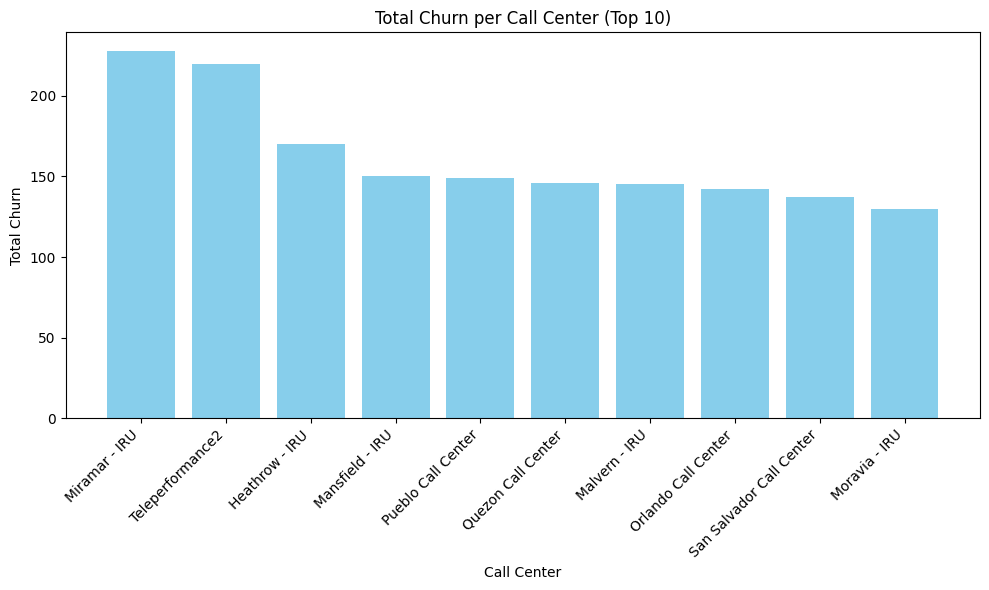

In [ ]:
total_churn_per_call_center = merged_df1.groupby('call_center')['churn'].sum().reset_index(name='total_churn')

# Sort the DataFrame by total churn in descending order
total_churn_per_call_center_sorted = total_churn_per_call_center.sort_values(by='total_churn', ascending=False)

# Get the top 10 call centers
top_10_call_centers = total_churn_per_call_center_sorted.head(10)

# Plot the top 10 call centers
plt.figure(figsize=(10, 6))
plt.bar(top_10_call_centers['call_center'], top_10_call_centers['total_churn'], color='skyblue')
plt.xlabel('Call Center')
plt.ylabel('Total Churn')
plt.title('Total Churn per Call Center (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

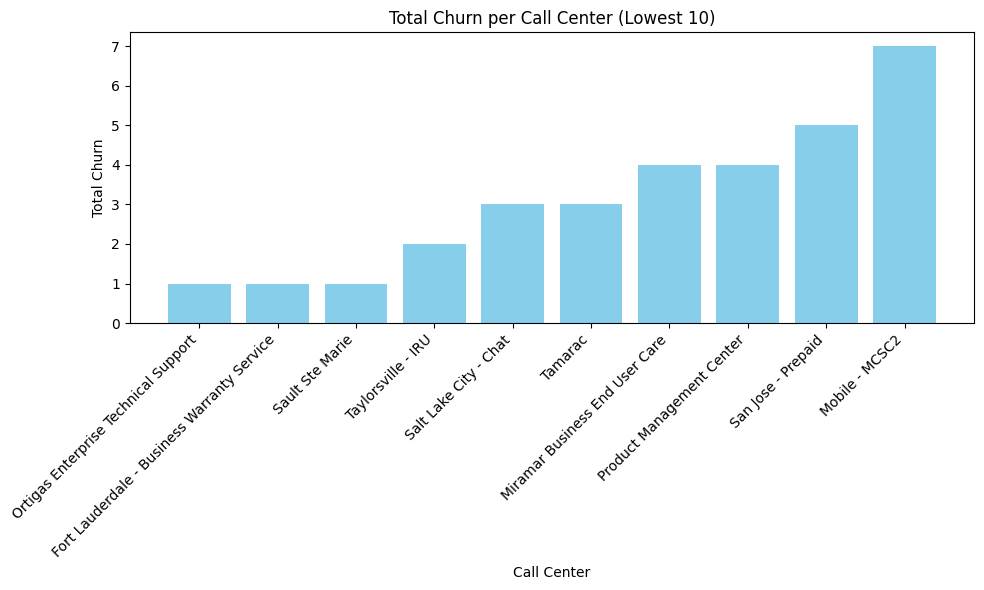

In [ ]:
total_churn_per_call_center = merged_df1.groupby('call_center')['churn'].sum().reset_index(name='total_churn')

# Sort the DataFrame by total churn in ascending order
total_churn_per_call_center_sorted = total_churn_per_call_center.sort_values(by='total_churn', ascending=True)

# Get the lowest 10 call centers
lowest_10_call_centers = total_churn_per_call_center_sorted.head(10)

# Plot the lowest 10 call centers
plt.figure(figsize=(10, 6))
plt.bar(lowest_10_call_centers['call_center'], lowest_10_call_centers['total_churn'], color='skyblue')
plt.xlabel('Call Center')
plt.ylabel('Total Churn')
plt.title('Total Churn per Call Center (Lowest 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

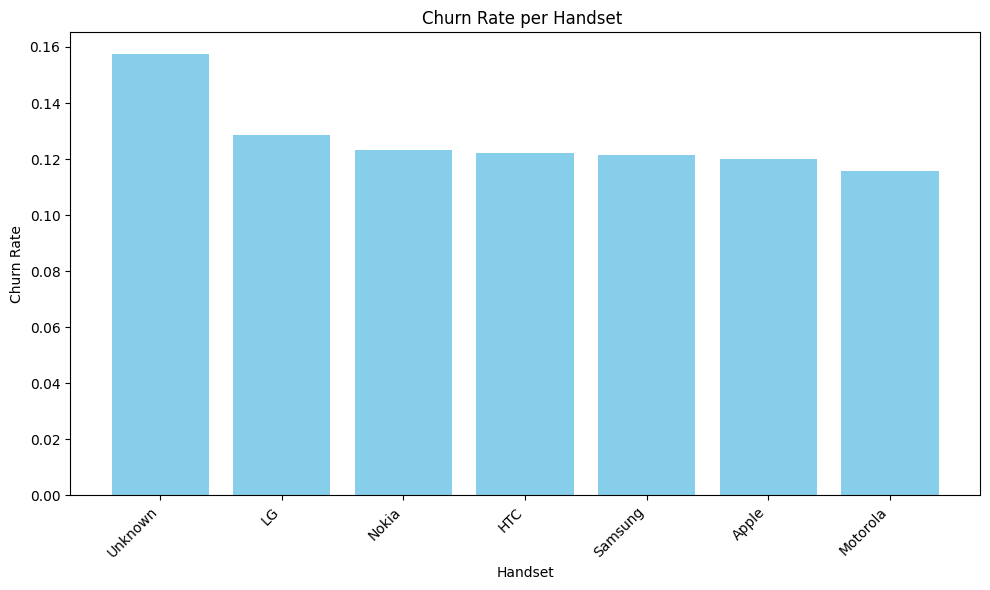

In [ ]:
total_churn_per_handset = merged_df1.groupby('handset')['churn'].mean().reset_index(name='churn_rate')

# Sort the DataFrame by churn rate in descending order
total_churn_per_handset_sorted = total_churn_per_handset.sort_values(by='churn_rate', ascending=False)

# Get the top 10 handsets by churn rate
top_10_handsets = total_churn_per_handset_sorted.head(10)

# Plot the top 10 handsets by churn rate
plt.figure(figsize=(10, 6))
plt.bar(top_10_handsets['handset'], top_10_handsets['churn_rate'], color='skyblue')
plt.xlabel('Handset')
plt.ylabel('Churn Rate')
plt.title('Churn Rate per Handset ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

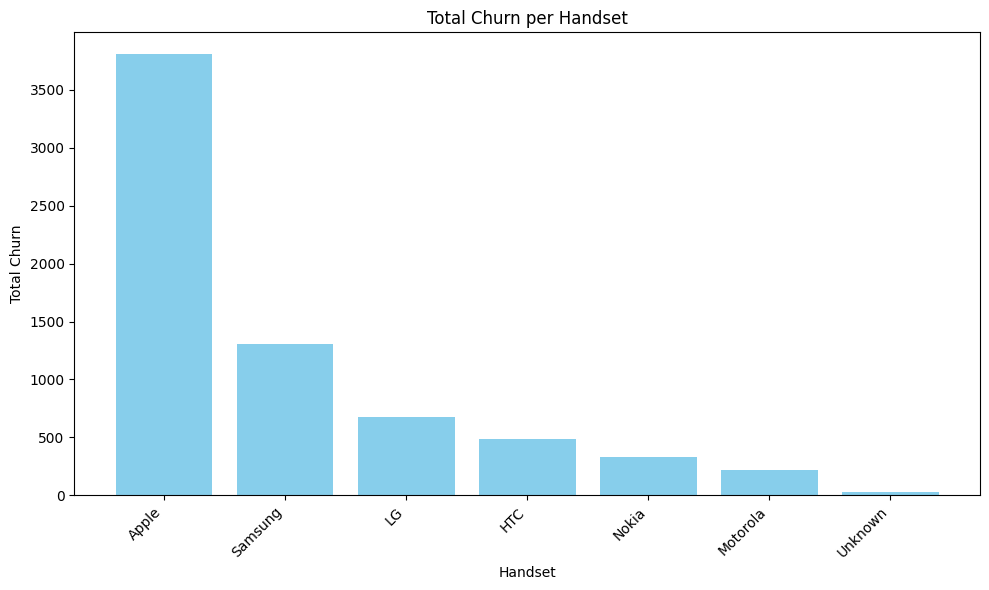

In [ ]:
total_churn_per_handset = merged_df1.groupby('handset')['churn'].sum().reset_index(name='total_churn')

# Sort the DataFrame by total churn in descending order
total_churn_per_handset_sorted = total_churn_per_handset.sort_values(by='total_churn', ascending=False)

# Get the top 10 handsets by total churn
top_10_handsets = total_churn_per_handset_sorted.head(10)

# Plot the top 10 handsets by total churn
plt.figure(figsize=(10, 6))
plt.bar(top_10_handsets['handset'], top_10_handsets['total_churn'], color='skyblue')
plt.xlabel('Handset')
plt.ylabel('Total Churn')
plt.title('Total Churn per Handset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
churn_by_handset = df2.groupby('handset')['churn'].value_counts()
highest_churn_handset = churn_by_handset.groupby(level=0).sum().sort_values(ascending=False).index[0]
print(f"Handset with highest churn rate: {highest_churn_handset}")

Handset with highest churn rate: Apple


In [ ]:
duplicate_columns = merged_df.columns[merged_df.columns.duplicated()]
print(duplicate_columns)

Index([], dtype='object')


In [ ]:
if len(duplicate_columns) > 0:
    merged_df = merged_df.rename(columns={duplicate_columns[0]: "call_center_renamed"})


In [ ]:
import pandas as pd

# Assuming your DataFrame is named merged_df

# Group by location and issue, and count the occurrences
top_issues_by_location = merged_df.groupby(['call_center', 'issue_level1']).size().reset_index(name='issue_count')

# Sort the DataFrame by issue count in descending order within each location group
top_issues_by_location_sorted = top_issues_by_location.sort_values(by=['call_center', 'issue_count'], ascending=[True, False])

# Get the top issue for each location
top_issues_by_location_sorted = top_issues_by_location_sorted.groupby('call_center').head(1)

# Display the top issues by location
print(top_issues_by_location_sorted)

                    call_center       issue_level1  issue_count
7           Alabang Call Center          Equipment          139
21           Albany Call Center          Equipment          102
28    Alexandria - Billing Chat            Account           54
55           Arnold Call Center          Equipment          242
70          Ashland Call Center               Bill          127
...                         ...                ...          ...
1301          Terre Haute - IRU  Bill and Payments          211
1313          Tulsa Call Center            Account          115
1332        Welland Call Center          Equipment          163
1347       Wheeling Call Center          Equipment           73
1358  Wichita Falls Call Center           Payments          328

[108 rows x 3 columns]


<ipython-input-46-ebd6e328f85a>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


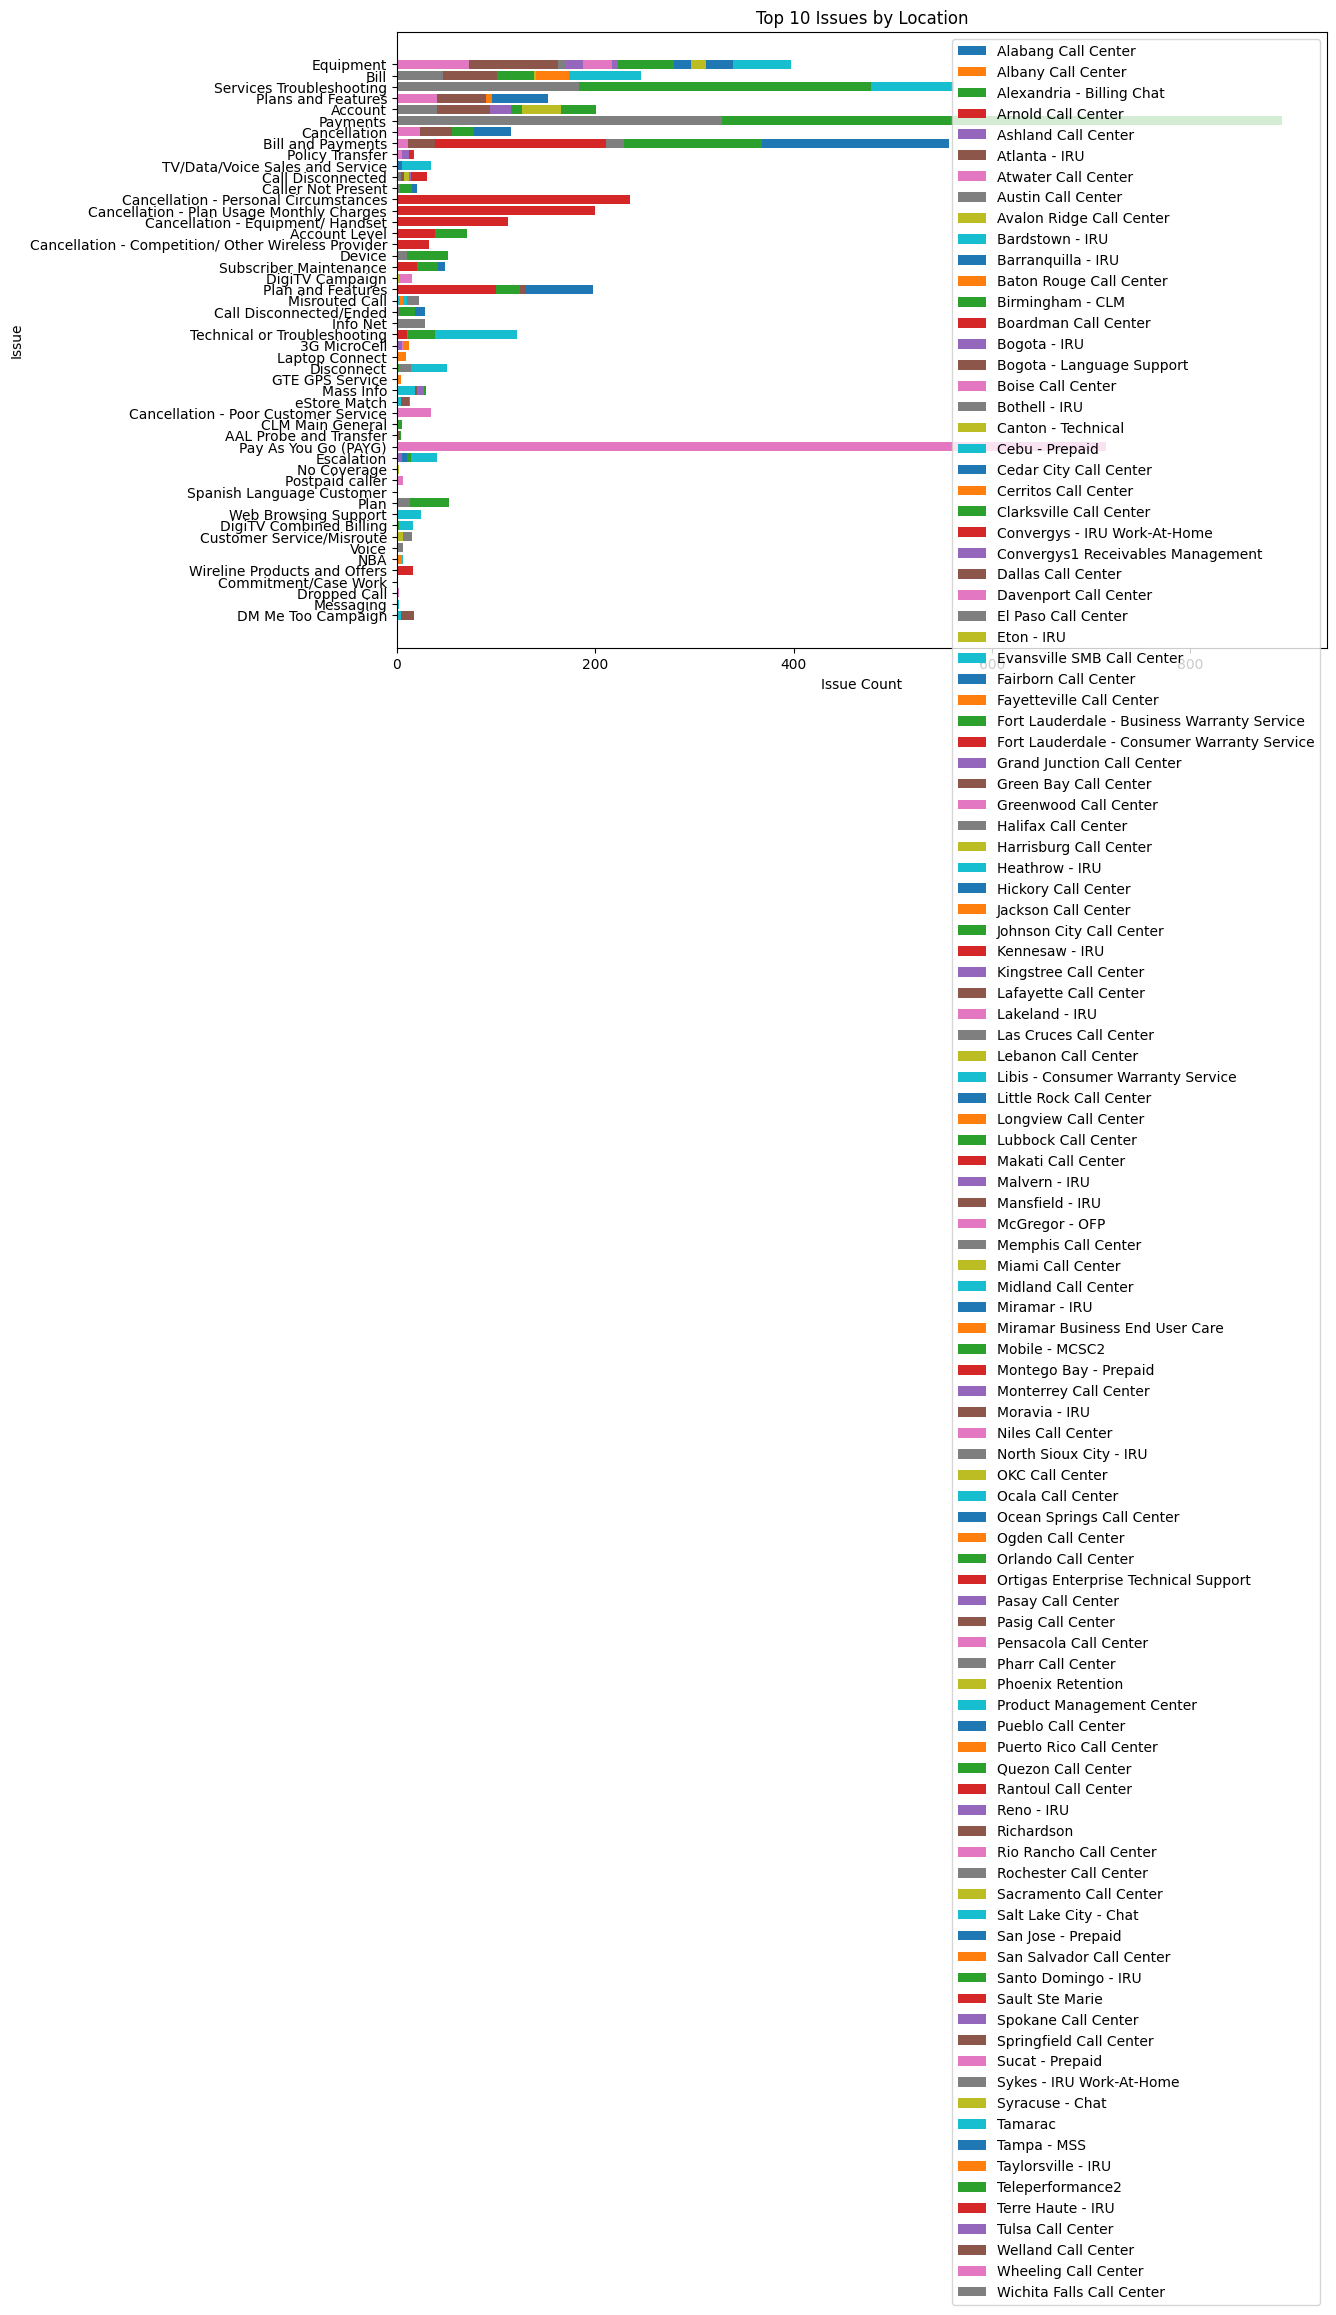

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by location and issue, and count the occurrences
top_issues_by_location = merged_df1.groupby(['call_center', 'issue_level1']).size().reset_index(name='issue_count')

# Sort the DataFrame by issue count in descending order within each location group
top_issues_by_location_sorted = top_issues_by_location.sort_values(by=['call_center', 'issue_count'], ascending=[True, False])

# Get the top 10 issues for each location
top_10_issues_by_location = top_issues_by_location_sorted.groupby('call_center').head(10)

# Plot the top 10 issues by location
plt.figure(figsize=(12, 8))
for call_center, data in top_10_issues_by_location.groupby('call_center'):
    plt.barh(data['issue_level1'], data['issue_count'], label=call_center)

plt.xlabel('Issue Count')
plt.ylabel('Issue')
plt.title('Top 10 Issues by Location')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.tight_layout()
plt.show()


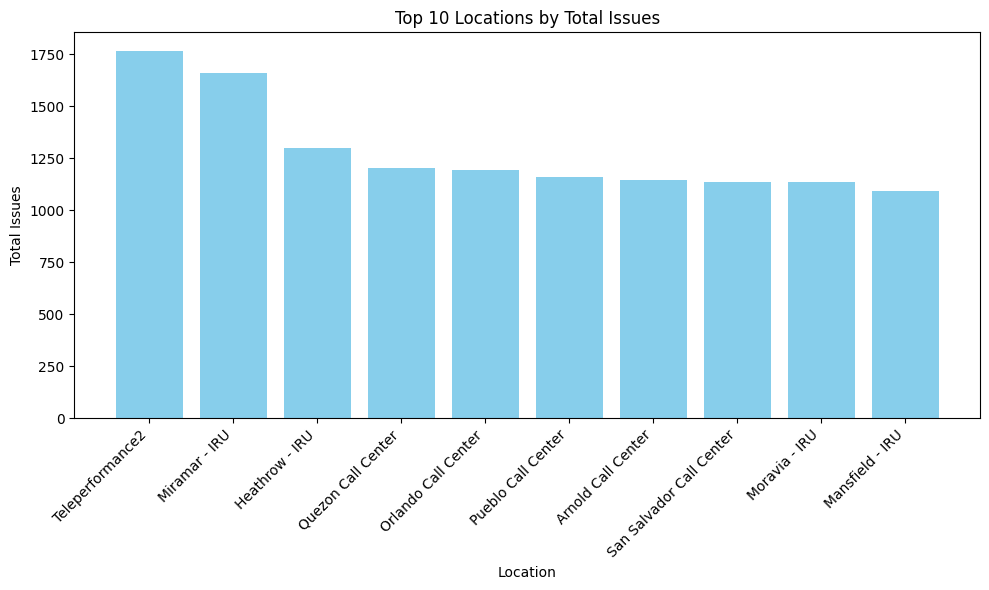

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df

# Group by location and issue, and count the occurrences
top_issues_by_location = merged_df1.groupby('call_center')['issue_level1'].count().reset_index(name='total_issues')

# Sort the DataFrame by total issue count in descending order
top_issues_by_location_sorted = top_issues_by_location.sort_values(by='total_issues', ascending=False)

# Get the top 10 locations
top_10_locations = top_issues_by_location_sorted.head(10)

# Plot the top 10 locations
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations['call_center'], top_10_locations['total_issues'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Total Issues')
plt.title('Top 10 Locations by Total Issues')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


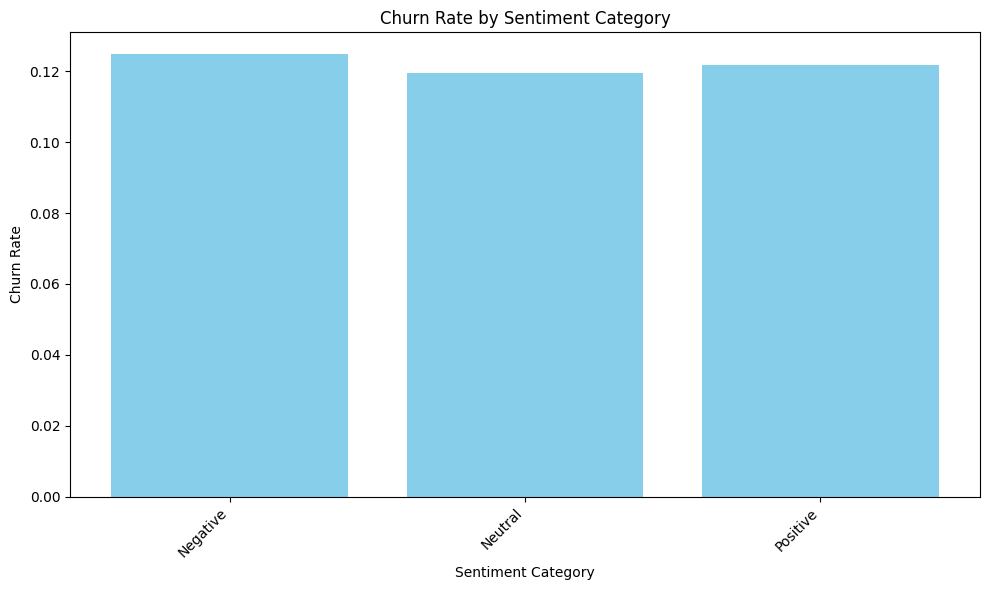

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df

# Group by sentiment category and calculate churn rate
churn_rate_by_sentiment = merged_df1.groupby('sentiment_category')['churn'].mean().reset_index(name='churn_rate')

# Plot the relationship between churn rate and sentiment categories
plt.figure(figsize=(10, 6))
plt.bar(churn_rate_by_sentiment['sentiment_category'], churn_rate_by_sentiment['churn_rate'], color='skyblue')
plt.xlabel('Sentiment Category')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Sentiment Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

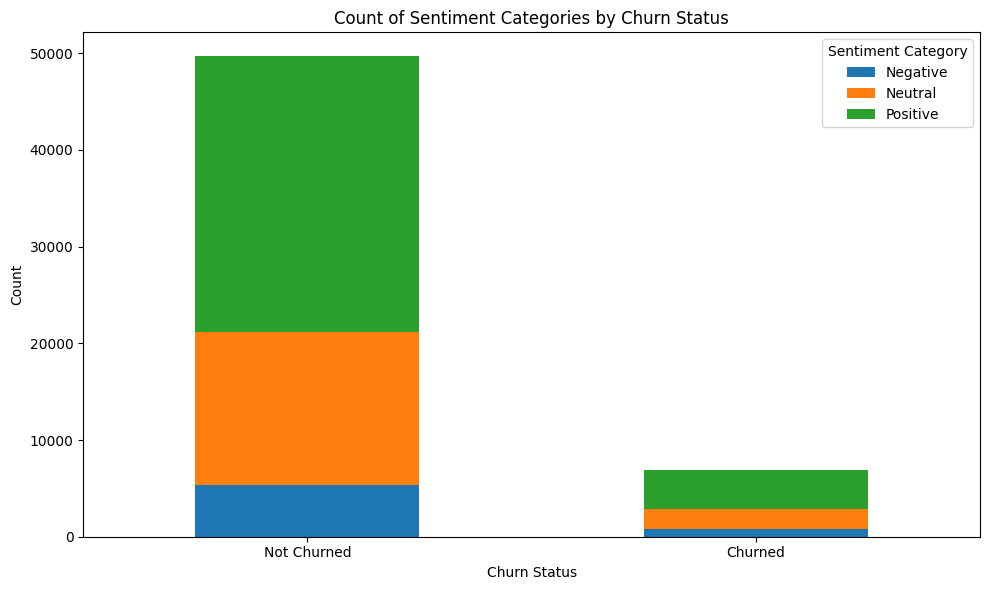

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df

# Group by churn status and sentiment category, and count the occurrences
sentiment_counts = merged_df1.groupby(['churn', 'sentiment_category']).size().reset_index(name='count')

# Pivot the DataFrame to have sentiment categories as columns
sentiment_pivot = sentiment_counts.pivot(index='churn', columns='sentiment_category', values='count').fillna(0)

# Plot the count of sentiment categories for churned and not churned customers
sentiment_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Count of Sentiment Categories by Churn Status')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)
plt.legend(title='Sentiment Category')
plt.tight_layout()
plt.show()


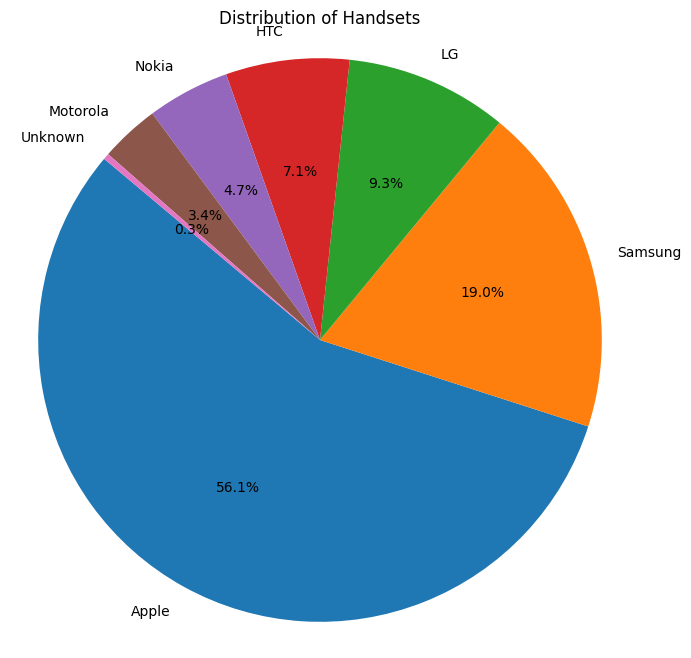

In [ ]:
handset_counts = merged_df1['handset'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(handset_counts, labels=handset_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Handsets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
arpu_by_region = merged_df1.groupby('region')['bill_data_usg_tot'].mean().reset_index(name='ARPU')

In [ ]:
product_performance = merged_df1.groupby('handset')['data_usage_amt'].sum()

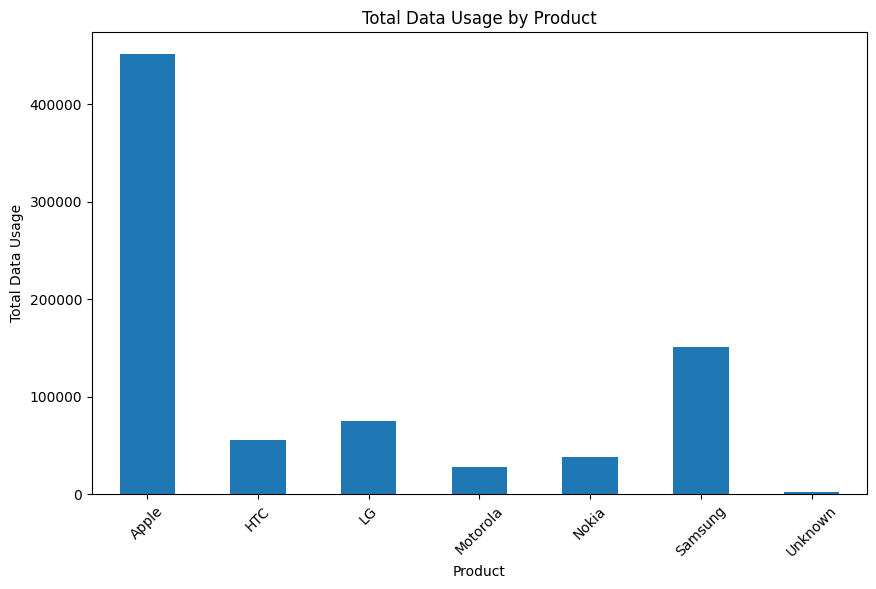

In [ ]:
product_performance.plot(kind='bar', figsize=(10, 6), title='Total Data Usage by Product')
plt.xlabel('Product')
plt.ylabel('Total Data Usage')
plt.xticks(rotation=45)
plt.show()

In [ ]:
arpu_by_product = merged_df1.groupby('handset')['avg_arpu_3m'].mean()

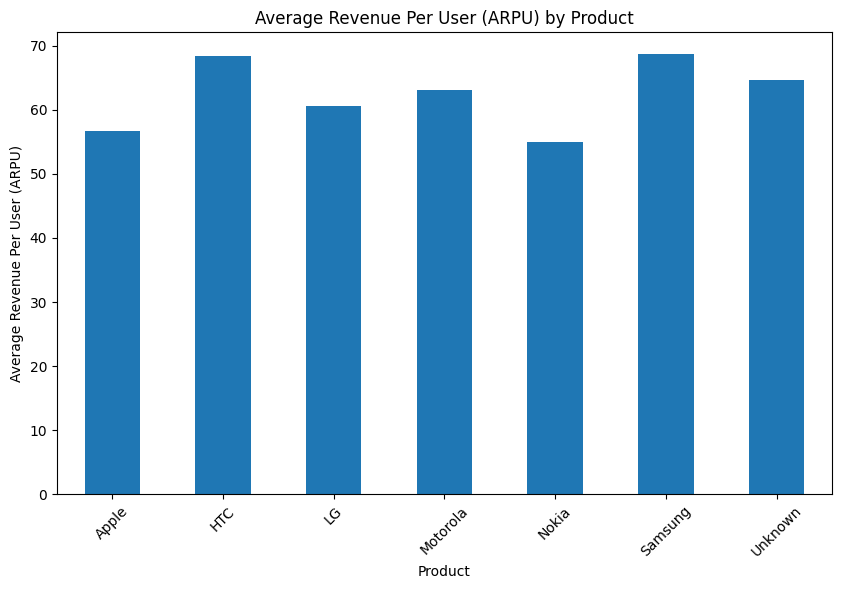

In [ ]:
arpu_by_product.plot(kind='bar', figsize=(10, 6), title='Average Revenue Per User (ARPU) by Product')
plt.xlabel('Product')
plt.ylabel('Average Revenue Per User (ARPU)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

In [ ]:
merged_df1 = pd.read_csv("/content/merged_data(decoded).csv")

In [ ]:
for column in merged_df1:
    if merged_df1[column].dtype != 'object' and merged_df1[column].isnull().any():
        mean_value = round(merged_df1[column].mean())
        merged_df1[column].fillna(value=mean_value, inplace=True)

missing_value = merged_df1.isnull().sum()
missing_value

Customer_ID            0
verbatims             37
call_center            0
issue_level1           0
issue_level2           0
                      ..
city_long              0
zip_lat                0
zip_long               0
sentiment_score        0
sentiment_category     0
Length: 130, dtype: int64

In [ ]:
# prompt: Product Recommendation System for merged_df1

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a function to recommend products based on KMeans clusters
def recommend_products(df, num_clusters):
    # Preprocess data
    df_scaled = StandardScaler().fit_transform(df[['data_usage_amt', 'bill_data_usg_tot', 'avg_arpu_3m']])

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_scaled)

    # Assign cluster labels to data points
    df['cluster'] = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    print(f"Silhouette score: {silhouette_avg}")

    # Recommend products based on cluster
    for i in range(num_clusters):
        cluster_df = df[df['cluster'] == i]
        top_products = cluster_df['handset'].value_counts().index[:3]
        print(f"Cluster {i + 1}: {top_products}")

# Use the function with your data
recommend_products(merged_df1, num_clusters=3)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.32824793694264415
Cluster 1: Index(['Apple', 'Samsung', 'LG'], dtype='object')
Cluster 2: Index(['Apple', 'Samsung', 'HTC'], dtype='object')
Cluster 3: Index(['Apple', 'Samsung', 'LG'], dtype='object')


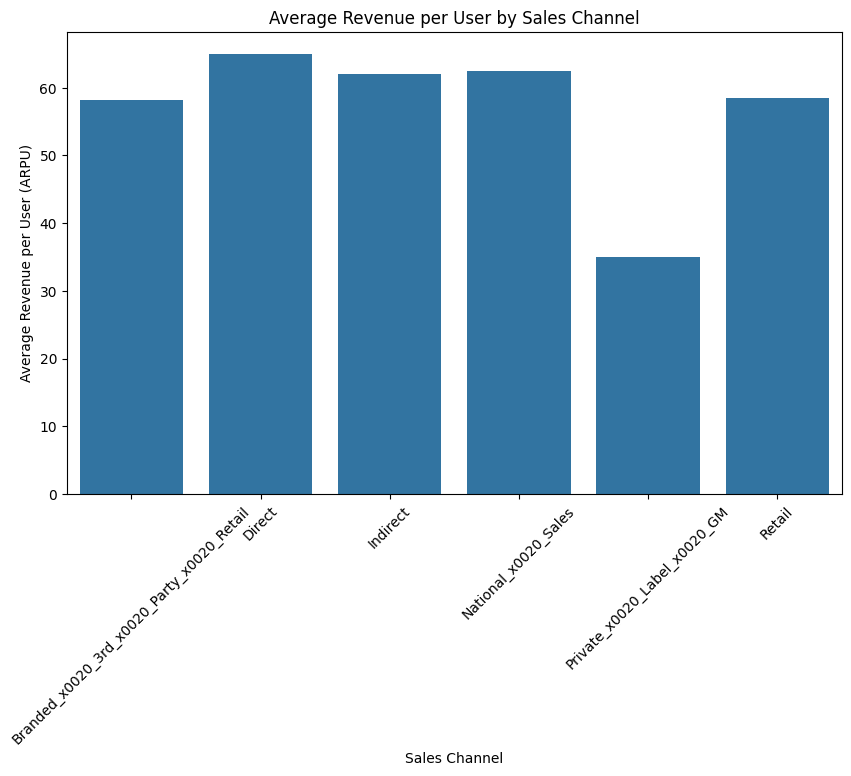

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
channel_arpu = merged_df1.groupby('sales_channel')['avg_arpu_3m'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_channel', y='avg_arpu_3m', data=channel_arpu)
plt.title('Average Revenue per User by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Revenue per User (ARPU)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

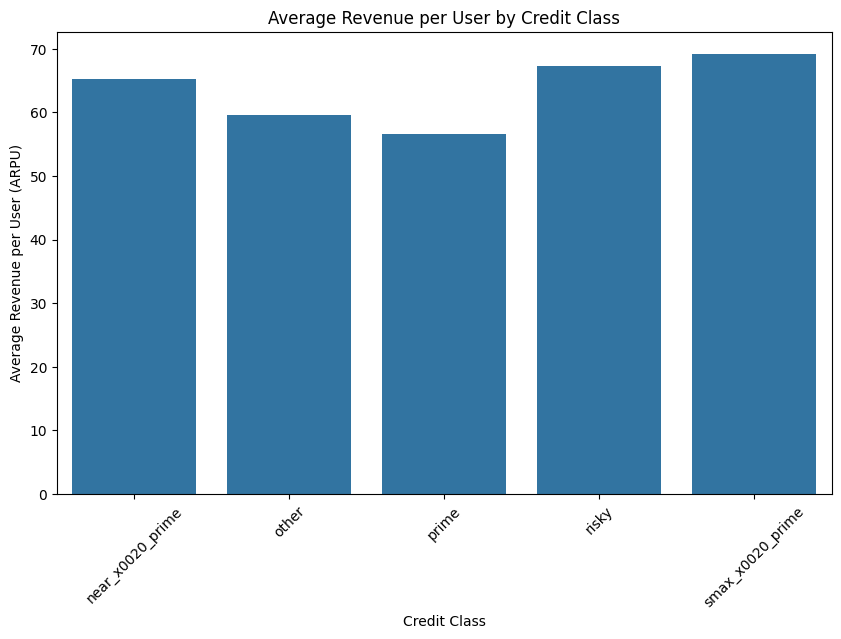

In [ ]:
credit_arpu = merged_df1.groupby('credit_class')['avg_arpu_3m'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='credit_class', y='avg_arpu_3m', data=credit_arpu)
plt.title('Average Revenue per User by Credit Class')
plt.xlabel('Credit Class')
plt.ylabel('Average Revenue per User (ARPU)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

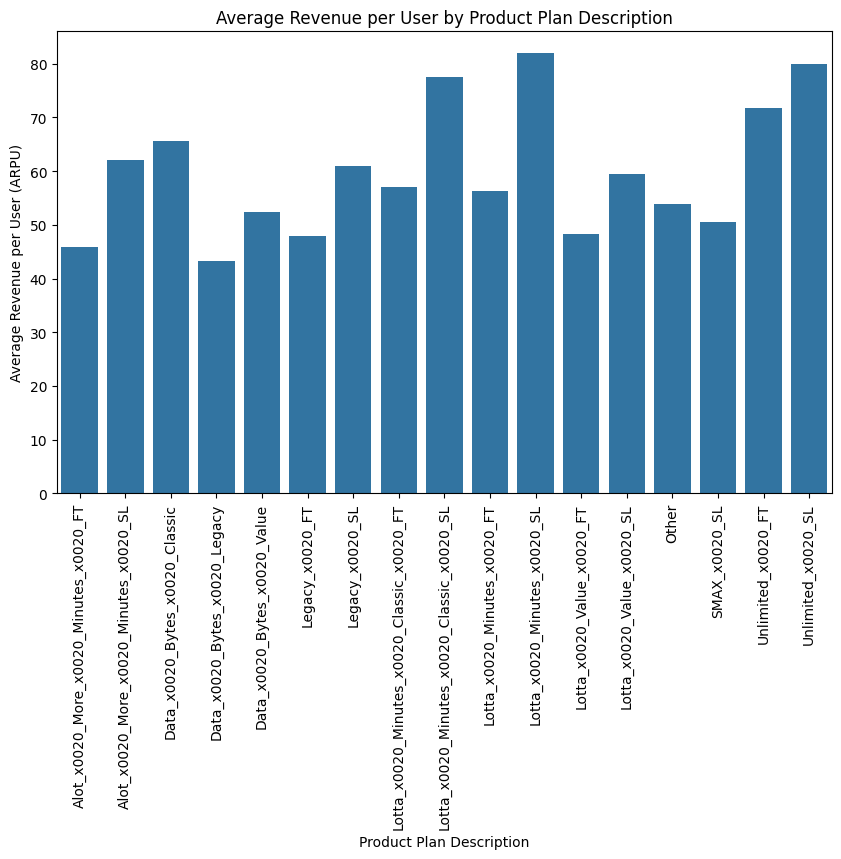

In [ ]:
plan_arpu = merged_df1.groupby('product_plan_desc')['avg_arpu_3m'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='product_plan_desc', y='avg_arpu_3m', data=plan_arpu)
plt.title('Average Revenue per User by Product Plan Description')
plt.xlabel('Product Plan Description')
plt.ylabel('Average Revenue per User (ARPU)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

<Figure size 1000x600 with 0 Axes>

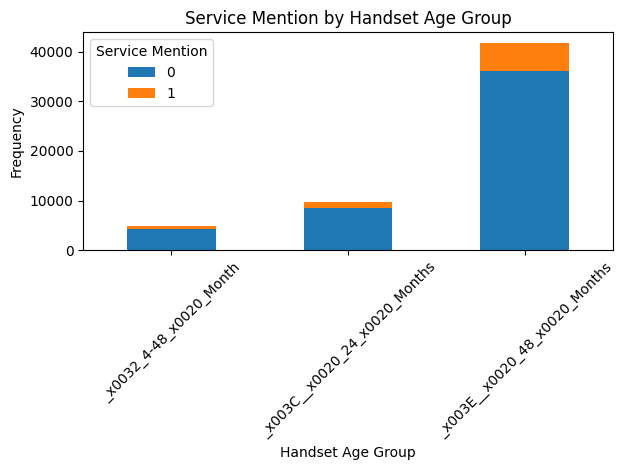

In [ ]:
cross_tab = pd.crosstab(merged_df1['handset_age_grp'], merged_df1['service_mention'])

# Plotting
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Service Mention by Handset Age Group')
plt.xlabel('Handset Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Service Mention')
plt.tight_layout()
plt.show()

In [ ]:
# Define X and y
X = merged_df1[['rfm_score', 'seconds_of_data_norm', 'calls_total', 'calls_in_offpk', 'voice_tot_bill_mou_curr', 'calls_out_pk']]
y = merged_df1['lifetime_value']


In [ ]:
from scipy import stats

# Calculate Z-scores for each column
z_scores = stats.zscore(X)

# Find indices of rows where Z-score is greater than 3 in absolute value
outlier_indices = (np.abs(z_scores) > 3).any(axis=1)

# Remove rows with outliers
X_filtered = X[~outlier_indices]
y_filtered = y[~outlier_indices]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the independent variables (X)
X_scaled = scaler_X.fit_transform(X_filtered)

# Reshape y to a 2D array if it's a single feature
if len(y.shape) == 1:
    y = y.values.reshape(-1, 1)

# Fit and transform the target variable (y)
y_filtered = y_filtered.values.reshape(-1, 1)

# Fit and transform the target variable (y)
y_scaled = scaler_y.fit_transform(y_filtered)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered,y_filtered, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 7601488.202022629
R-squared: 0.6160576166440175


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate accuracy metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree - Mean Squared Error:", mse_tree)
print("Decision Tree - R-squared:", r2_tree)


Decision Tree - Mean Squared Error: 13516926.087900903
Decision Tree - R-squared: 0.31727568603547507


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Gradient Boosting model
gbm_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Calculate accuracy metrics
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print("Gradient Boosting Machines - Mean Squared Error:", mse_gbm)
print("Gradient Boosting Machines - R-squared:", r2_gbm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Machines - Mean Squared Error: 6752840.010184795
Gradient Boosting Machines - R-squared: 0.6589218559541916


In [ ]:
from scipy import stats

# Define a function to remove outliers based on Z-score
def remove_outliers_zscore(df, column):
    # Calculate Z-score for each data point
    z_scores = stats.zscore(df[column])
    # Define a threshold for outliers (e.g., Z-score > 3 or < -3)
    threshold = 3
    # Filter out rows where Z-score exceeds the threshold
    df_no_outliers = df[(z_scores < threshold) & (z_scores > -threshold)]
    return df_no_outliers

# Apply the function to remove outliers from the 'acct_age' column
merged_df_no_outliers = remove_outliers_zscore(merged_df1, 'acct_age')

# Check the shape of the dataframe before and after removing outliers
print("Shape before removing outliers:", merged_df1.shape)
print("Shape after removing outliers:", merged_df_no_outliers.shape)


Shape before removing outliers: (56544, 130)
Shape after removing outliers: (56121, 130)


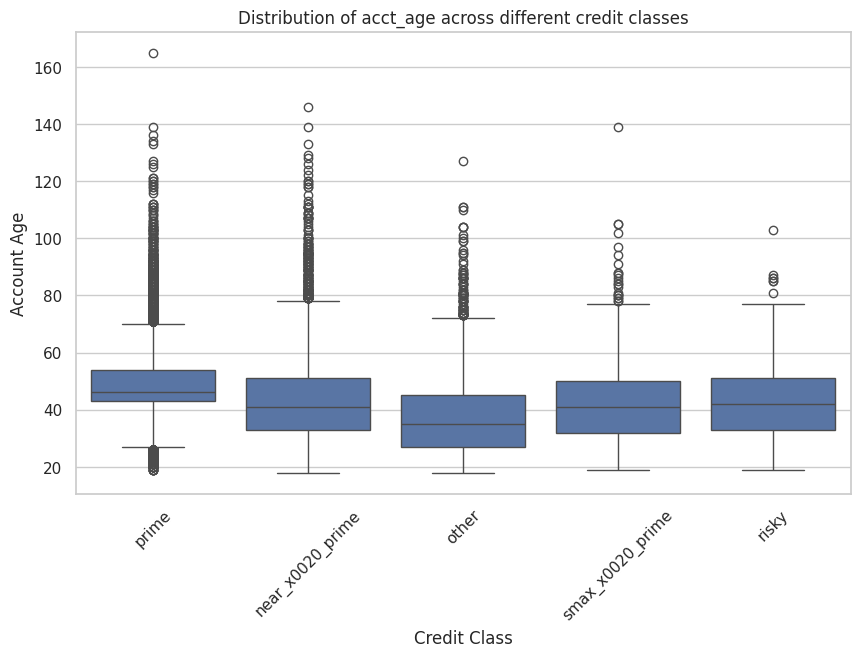

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_class', y='acct_age', data=merged_df1)
plt.title('Distribution of acct_age across different credit classes')
plt.xlabel('Credit Class')
plt.ylabel('Account Age')
plt.xticks(rotation=45)
plt.show()


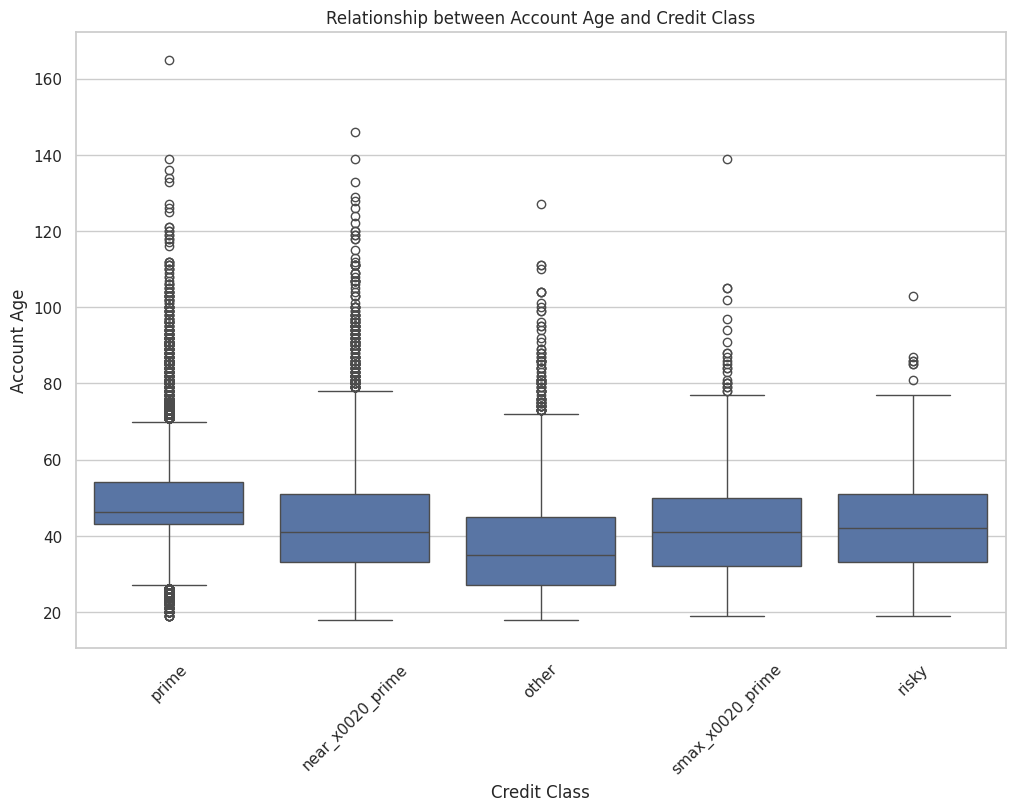

In [ ]:
plt.figure(figsize=(12, 8))

# Create a box plot to visualize the relationship between acct_age and credit_class
sns.boxplot(x='credit_class', y='acct_age', data=merged_df1)

# Set the labels and title
plt.xlabel('Credit Class')
plt.ylabel('Account Age')
plt.title('Relationship between Account Age and Credit Class')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:
merged_df1.describe()

,Customer_ID,upsell_xsell,churn,lifetime_value,avg_arpu_3m,acct_age,billing_cycle,nbr_contracts_ltd,rfm_score,Est_HH_Income,...,seconds_of_data_log,region_lat,region_long,state_lat,state_long,city_lat,city_long,zip_lat,zip_long,sentiment_score
count,5.654400e+04,56544.000000,56544.000000,56544.000000,55424.000000,56544.000000,56544.000000,56544.000000,56544.000000,56544.000000,...,50390.000000,56544.000000,56544.000000,56544.000000,56544.000000,53381.000000,53381.000000,56544.000000,56544.000000,56544.000000
mean,1.872150e+06,0.041631,0.121339,5281.553493,60.294822,45.172890,6.623567,4.161553,221.999859,31732.219157,...,8.452867,38.894979,-92.842286,37.808895,-92.170275,37.479516,-92.106442,37.540044,-91.903355,0.236259
std,1.214299e+06,0.199747,0.326524,5068.566378,22.876775,12.906649,3.189793,2.637357,82.060981,13800.430372,...,1.882940,3.944025,15.182782,5.015843,16.245211,5.217177,16.088228,5.196423,16.261473,0.342830
min,4.710000e+02,0.000000,0.000000,-14006.000000,0.000000,18.000000,1.000000,1.000000,111.000000,0.000000,...,0.000000,32.620870,-120.981000,20.710960,-156.872000,19.430830,-170.479000,19.101980,-170.409000,-1.000000
25%,7.840942e+05,0.000000,0.000000,1586.775000,49.990000,36.000000,4.000000,2.000000,131.000000,20600.000000,...,8.086103,34.524660,-96.547900,33.957420,-97.602800,33.790000,-97.855800,33.871210,-97.831300,0.000000
50%,1.860532e+06,0.000000,0.000000,3822.600000,54.990000,46.176471,7.000000,4.000000,222.000000,29900.000000,...,9.038484,39.044790,-87.670900,38.173880,-86.722700,38.391390,-87.650000,38.572780,-87.408950,0.153333
75%,2.929642e+06,0.000000,0.000000,7434.625000,73.320000,52.000000,9.000000,5.000000,313.000000,43800.000000,...,9.508666,41.869560,-84.506800,40.657800,-79.535300,41.448890,-80.549700,41.357950,-80.203275,0.500000
max,3.999922e+06,1.000000,1.000000,60740.200000,160.376185,165.000000,12.000000,16.645308,333.000000,263400.000000,...,11.208274,43.897890,-71.477100,61.289070,-69.418400,71.290560,-67.076400,71.299530,-67.087000,1.000000


In [ ]:


# Select relevant columns
ethnicity_columns = ['cs_hispanic', 'cs_caucasian', 'cs_afr_amer', 'cs_other']
analysis_columns = ['lifetime_value', 'avg_arpu_3m', 'churn', 'product_plan_desc']

# Filter the data for relevant columns
ethnicity_data = merged_df1[ethnicity_columns + analysis_columns]

# 1. Lifetime Value (LTV)
avg_ltv_by_ethnicity = ethnicity_data.groupby(ethnicity_columns)['lifetime_value'].mean()

# 2. Average Revenue Per User (ARPU)
avg_arpu_by_ethnicity = ethnicity_data.groupby(ethnicity_columns)['avg_arpu_3m'].mean()

# 3. Churn Rate
churn_rate_by_ethnicity = ethnicity_data.groupby(ethnicity_columns)['churn'].mean()

# 4. Product Usage (Product Plan Description)
product_usage_by_ethnicity = ethnicity_data.groupby(ethnicity_columns)['product_plan_desc'].value_counts(normalize=True)


# Print the results
print("Average Lifetime Value by Ethnicity:")
print(avg_ltv_by_ethnicity)

print("\nAverage ARPU by Ethnicity:")
print(avg_arpu_by_ethnicity)

print("\nChurn Rate by Ethnicity:")
print(churn_rate_by_ethnicity)

print("\nProduct Usage by Ethnicity:")
print(product_usage_by_ethnicity)



Average Lifetime Value by Ethnicity:
cs_hispanic  cs_caucasian  cs_afr_amer  cs_other
0.04         98.85         0.21         0.89         9851.600000
             99.29         0.13         0.55         1656.650000
0.05         98.95         0.08         0.92          760.300000
             98.99         0.20         0.76         5104.400000
             99.26         0.05         0.65        11411.100000
                                                        ...     
97.42        1.92          0.01         0.65         3302.022222
97.80        1.91          0.05         0.24         4693.200000
97.90        1.48          0.12         0.50         4666.166667
98.56        1.23          0.03         0.18          495.700000
98.58        1.08          0.01         0.33         6351.100000
Name: lifetime_value, Length: 14631, dtype: float64

Average ARPU by Ethnicity:
cs_hispanic  cs_caucasian  cs_afr_amer  cs_other
0.04         98.85         0.21         0.89         46.242500
       

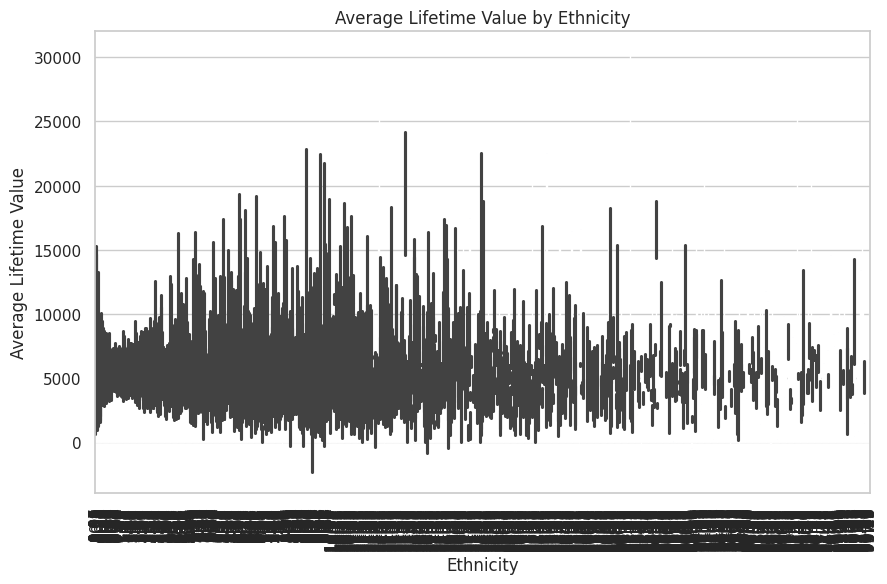

In [ ]:

avg_ltv_by_ethnicity_df = avg_ltv_by_ethnicity.reset_index()
avg_arpu_by_ethnicity_df = avg_arpu_by_ethnicity.reset_index()
churn_rate_by_ethnicity_df = churn_rate_by_ethnicity.reset_index()
product_usage_by_ethnicity_df = product_usage_by_ethnicity.unstack().reset_index()
# Plotting Average Lifetime Value by Ethnicity
plt.figure(figsize=(10, 6))
sns.barplot(x='cs_hispanic', y='lifetime_value', data=avg_ltv_by_ethnicity_df)
plt.title('Average Lifetime Value by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Average Lifetime Value')
plt.xticks(rotation=90)
plt.show()

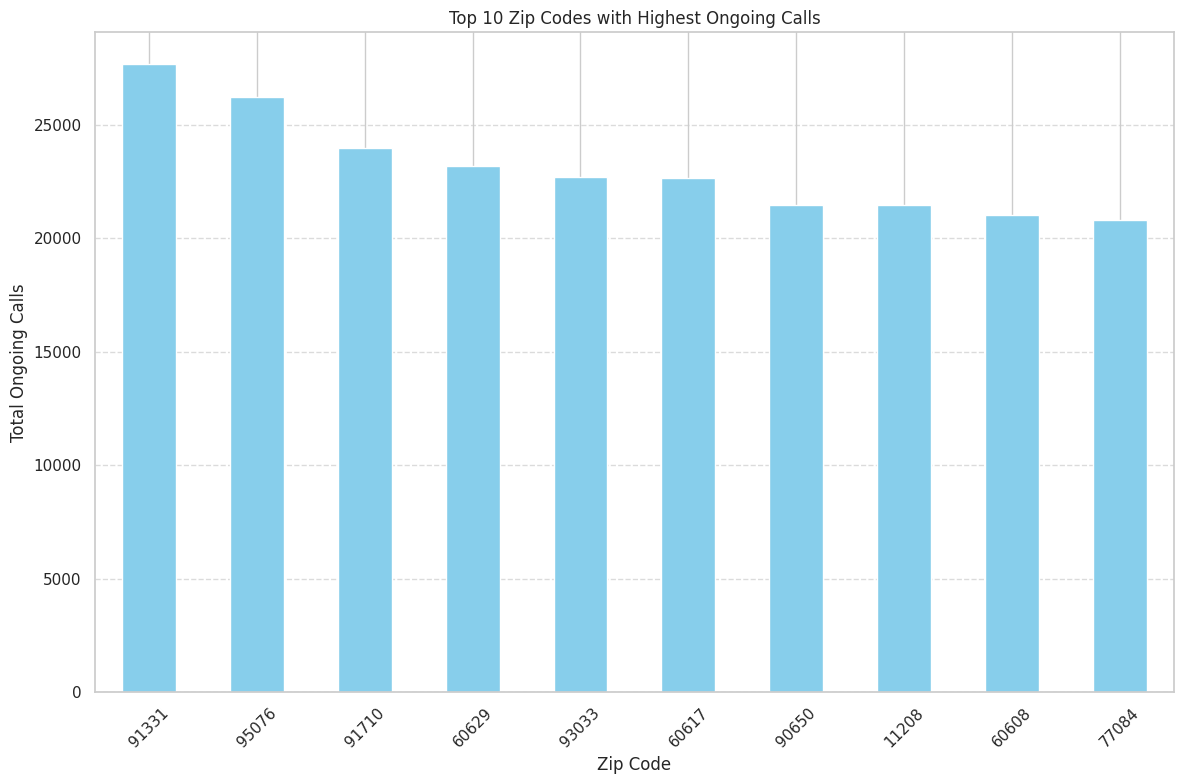

In [ ]:
# Get the top 10 zip codes with the highest ongoing calls
top_10_zipcodes = merged_df1.groupby('zipcode_primary')['calls_total'].sum().nlargest(10)

# Plotting the top 10 zip codes with the highest ongoing calls
plt.figure(figsize=(12, 8))
top_10_zipcodes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Zip Codes with Highest Ongoing Calls')
plt.xlabel('Zip Code')
plt.ylabel('Total Ongoing Calls')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

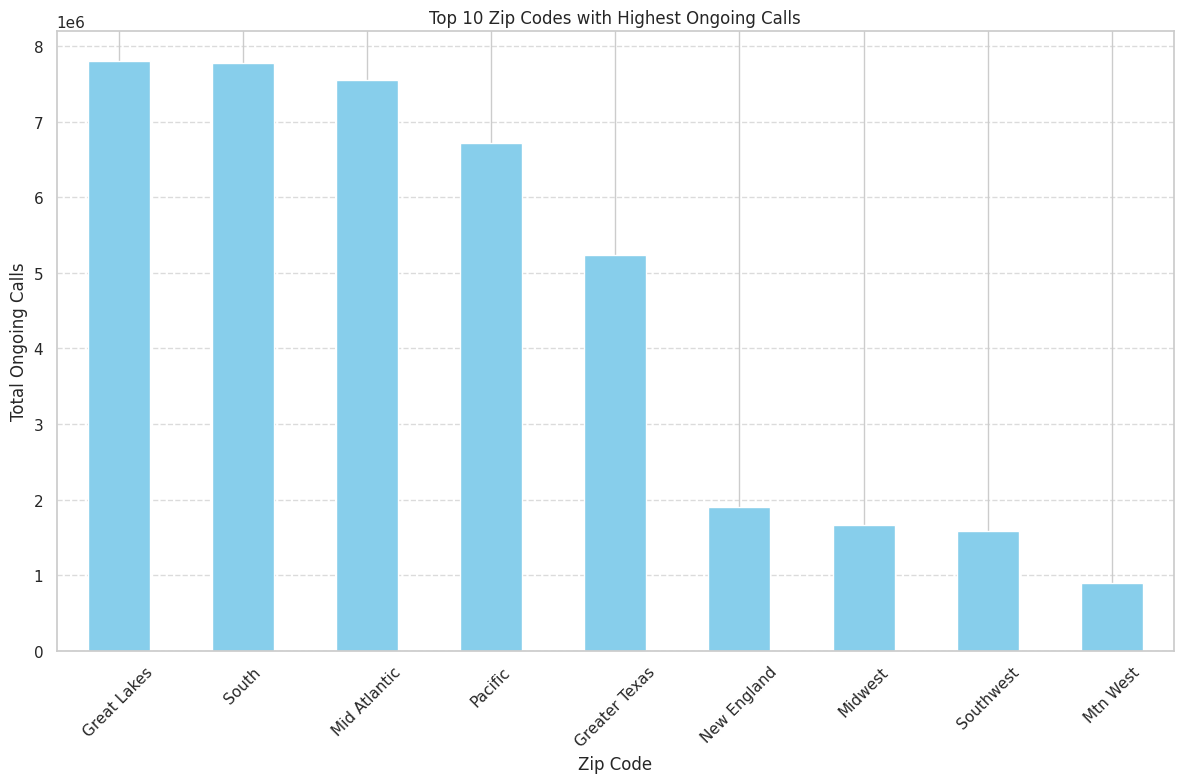

In [ ]:
top_10_zipcodes = merged_df1.groupby('region')['calls_total'].sum().nlargest(10)

# Plotting the top 10 zip codes with the highest ongoing calls
plt.figure(figsize=(12, 8))
top_10_zipcodes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Zip Codes with Highest Ongoing Calls')
plt.xlabel('Zip Code')
plt.ylabel('Total Ongoing Calls')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()